<font size = '6'><center> **Causal Inference in Multisensory Perception**</center> </font>

link - https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0000943

In [71]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('grayscale')

In [86]:
#constants 
sigmas_p = 12.3
sigmas_a = 9.2
sigmas_v = 2.14
p_c = 0.28
mu_p = 0

#stimuli locations
stim_a = np.array([-10, -5, 0, 5, 10])
stim_v = np.array([-10, -5, 0, 5, 10])

#iterations
its = 10

#create a matrix to accumulate the values 
responses_v = []
responses_a = []
    
for sa in stim_a:

    for sv in stim_v:
        
        resp_v = np.zeros(5)
        resp_a = np.zeros(5)
        
        for i in range(its):
            
            #calculate the internal measurement of the location
            x_a = np.random.normal(sa, sigmas_a, size = 1)
            x_v = np.random.normal(sv, sigmas_v, size = 1)
            
            #calculate if its a common cause or seperate
            
            #common cause
            t1 = 1 / (2*np.pi*np.sqrt(sigmas_v*sigmas_a + sigmas_v*sigmas_p + sigmas_a*sigmas_p))
            
            t2 = np.exp(-1/2 * ((x_v - x_a)**2*sigmas_p + (x_v - mu_p)**2*sigmas_a + (x_a - mu_p)**2*sigmas_v)/ \
                        (sigmas_v*sigmas_a + sigmas_v*sigmas_p + sigmas_a*sigmas_p))
            
            pxc1 = t1/t2
            
            #find seperate cause
            
            pxc2 = (1/(2*np.pi*np.sqrt((sigmas_v+sigmas_p)*(sigmas_a+sigmas_p))))*np.exp(-1/2*(((x_v - mu_p)**2\
                        /(sigmas_v + sigmas_p)) + (x_a - mu_p)**2/(sigmas_a + sigmas_p)))
            
            
            
            #find the probability of causation is common given x_v and x_a
            pc1x = pxc1 * p_c / (pxc1 * p_c + pxc2 * (1 - p_c))
            
            
            if pc1x > 0.5:
                
                #then common cause
                SA = (x_v/sigmas_v + x_a/sigmas_a + mu_p/sigmas_p)/(1/sigmas_v + 1/sigmas_a + 1/sigmas_p)
                SV = SA
                
            else:
                
                #then seperate cause
                SV = (x_v/sigmas_v + mu_p/sigmas_p)/(1/sigmas_v + 1/sigmas_p)
                SA = (x_a/sigmas_a + mu_p/sigmas_p)/(1/sigmas_a + 1/sigmas_p)
                
            
            #find the mean squared error between stimuli and actual location
            mse_vision = (stim_v - SV)**2
            mse_audition = (stim_a - SA)**2
            
            #closest
            sh_v = np.argmin(mse_vision)
            sh_a = np.argmin(mse_audition)
            
            resp_v[sh_v] += 1
            resp_a[sh_a] += 1
        
        responses_v.append(resp_v)
        responses_a.append(resp_a)

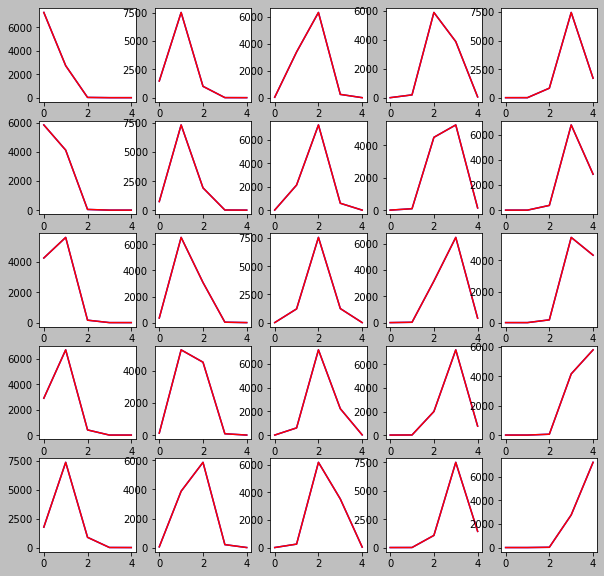

In [85]:
plt.figure(figsize = (10, 10))

for i in range(len(responses_v)):
    
    plot_loc = i + 1
    
    ax1 = plt.subplot(5, 5, i + 1)
    ax1.plot(responses_v[i], color = 'b')
    ax1.plot(responses_a[i], color = 'r')

In [87]:
responses_v

[array([7., 3., 0., 0., 0.]),
 array([0., 7., 3., 0., 0.]),
 array([0., 4., 6., 0., 0.]),
 array([0., 0., 8., 2., 0.]),
 array([ 0.,  0.,  0., 10.,  0.]),
 array([3., 7., 0., 0., 0.]),
 array([ 0., 10.,  0.,  0.,  0.]),
 array([0., 3., 7., 0., 0.]),
 array([0., 0., 7., 3., 0.]),
 array([0., 0., 2., 8., 0.]),
 array([6., 3., 1., 0., 0.]),
 array([0., 7., 3., 0., 0.]),
 array([0., 0., 8., 2., 0.]),
 array([0., 0., 2., 7., 1.]),
 array([0., 0., 1., 5., 4.]),
 array([2., 7., 1., 0., 0.]),
 array([1., 4., 5., 0., 0.]),
 array([0., 0., 5., 5., 0.]),
 array([0., 0., 2., 8., 0.]),
 array([0., 0., 0., 5., 5.]),
 array([1., 7., 2., 0., 0.]),
 array([0., 6., 4., 0., 0.]),
 array([0., 1., 4., 5., 0.]),
 array([0., 0., 1., 7., 2.]),
 array([0., 0., 0., 3., 7.])]

In [88]:
responses_a

[array([7., 3., 0., 0., 0.]),
 array([0., 7., 3., 0., 0.]),
 array([0., 4., 6., 0., 0.]),
 array([0., 0., 8., 2., 0.]),
 array([ 0.,  0.,  0., 10.,  0.]),
 array([3., 7., 0., 0., 0.]),
 array([ 0., 10.,  0.,  0.,  0.]),
 array([0., 3., 7., 0., 0.]),
 array([0., 0., 7., 3., 0.]),
 array([0., 0., 2., 8., 0.]),
 array([6., 3., 1., 0., 0.]),
 array([0., 7., 3., 0., 0.]),
 array([0., 0., 8., 2., 0.]),
 array([0., 0., 2., 7., 1.]),
 array([0., 0., 1., 5., 4.]),
 array([2., 7., 1., 0., 0.]),
 array([1., 4., 5., 0., 0.]),
 array([0., 0., 5., 5., 0.]),
 array([0., 0., 2., 8., 0.]),
 array([0., 0., 0., 5., 5.]),
 array([1., 7., 2., 0., 0.]),
 array([0., 6., 4., 0., 0.]),
 array([0., 1., 4., 5., 0.]),
 array([0., 0., 1., 7., 2.]),
 array([0., 0., 0., 3., 7.])]